In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Pierre\AppData\Local\Temp\ipykernel_11352\2175976762.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate_by_band = df.groupby('debt_ratio_band')['is_default'].mean().reset_index()
C:\Users\Pierre\AppData\Local\Temp\ipykernel_11352\2175976762.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_rate_by_band, x='debt_ratio_band', y='is_default', palette='flare')


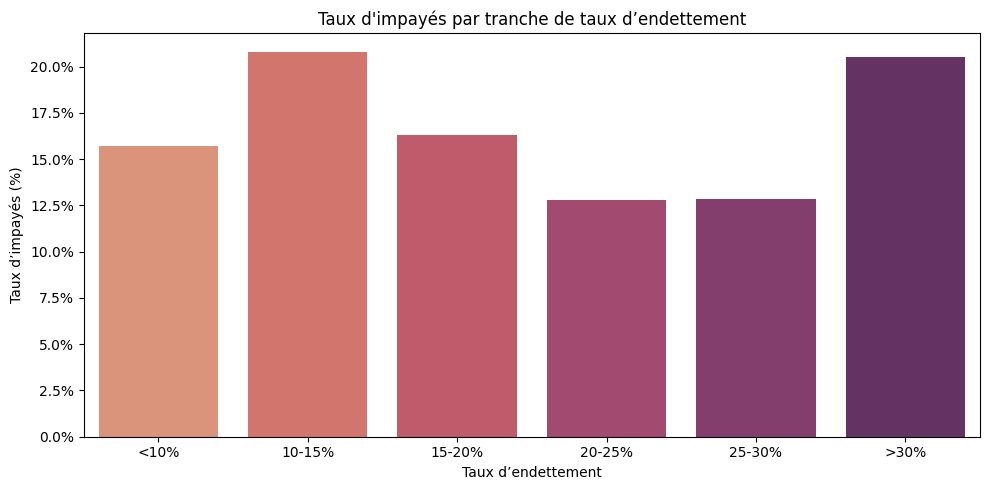

In [ ]:
# 🔹 Chargement
df = pd.read_parquet("../../data/cleaning/step2_with_monthly_payment_corrected.parquet")

# 🔹 Calcul du taux d’endettement
df['installment_vs_income_ratio'] = df['installment'] / (df['annual_inc'] / 12)

# 🔹 Définition des tranches de taux d’endettement
bins = [0, 0.1, 0.15, 0.20, 0.25, 0.30, df['installment_vs_income_ratio'].max()]
labels = ['<10%', '10-15%', '15-20%', '20-25%', '25-30%', '>30%']
df['debt_ratio_band'] = pd.cut(df['installment_vs_income_ratio'], bins=bins, labels=labels, include_lowest=True)

# 🔹 Création d’une colonne "en défaut"
df['is_default'] = df['loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)'])

# 🔹 Calcul du taux d’impayés par tranche
default_rate_by_band = df.groupby('debt_ratio_band')['is_default'].mean().reset_index()

# 🔹 Visualisation
plt.figure(figsize=(10, 5))
sns.barplot(data=default_rate_by_band, x='debt_ratio_band', y='is_default', palette='flare')
plt.title("Taux d'impayés par tranche de taux d’endettement")
plt.xlabel("Taux d’endettement")
plt.ylabel("Taux d’impayés (%)")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1%}'))
plt.tight_layout()
plt.show()

In [3]:
# 🔍 Objectif : Explorer les statuts de prêt pour valider la logique binaire "défaut vs non défaut"
print("Valeurs uniques de loan_status :")
print(df['loan_status'].value_counts())

Valeurs uniques de loan_status :
loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64


C:\Users\Pierre\AppData\Local\Temp\ipykernel_11352\682047625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_counts.index.map({0: 'Non Défaut', 1: 'Défaut'}),


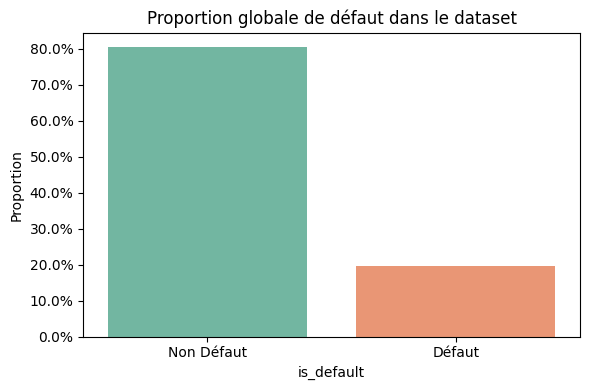

In [5]:
# 📊 Visualiser la répartition défaut / non défaut
df['is_default'] = df['loan_status'].isin(['Charged Off', 'Default']).astype(int)
default_counts = df['is_default'].value_counts(normalize=True)

plt.figure(figsize=(6, 4))
sns.barplot(x=default_counts.index.map({0: 'Non Défaut', 1: 'Défaut'}), 
            y=default_counts.values, palette='Set2')
plt.title("Proportion globale de défaut dans le dataset")
plt.ylabel("Proportion")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1%}'))
plt.tight_layout()
plt.show()

C:\Users\Pierre\AppData\Local\Temp\ipykernel_11352\999512830.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_by_grade, x='grade', y='is_default', palette='viridis')


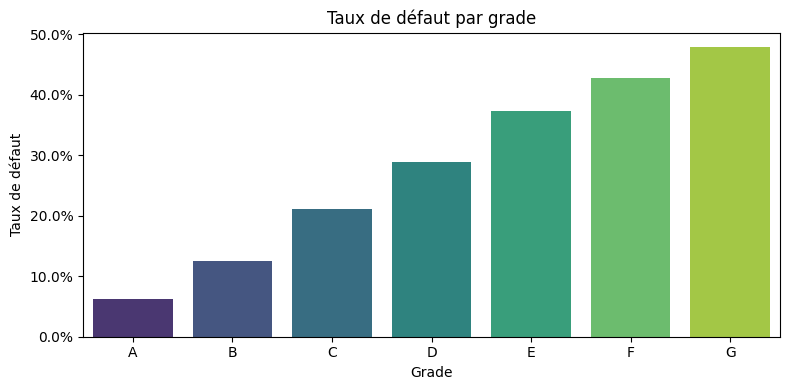

In [6]:
# 🎯 Analyser le taux de défaut par grade
default_by_grade = df.groupby('grade')['is_default'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(data=default_by_grade, x='grade', y='is_default', palette='viridis')
plt.title("Taux de défaut par grade")
plt.xlabel("Grade")
plt.ylabel("Taux de défaut")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1%}'))
plt.tight_layout()
plt.show()

c:\Users\Pierre\Desktop\Projet Crédit pour tous\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2888: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\Pierre\AppData\Local\Temp\ipykernel_11352\3736126575.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_clean.values, y=correlations_clean.index, palette='coolwarm')


Corrélations avec grade (triées par importance) :
int_rate                       0.689739
term                           0.457524
is_default                     0.257286
revol_util                     0.255250
loan_amnt                      0.175198
installment                    0.139552
monthly_payment_calculated     0.137520
dti                            0.136133
mort_acc                      -0.075255
pub_rec                        0.068778
pub_rec_bankruptcies           0.061583
annual_inc                    -0.031231
total_acc                     -0.025932
open_acc                       0.019321
revol_bal                     -0.008639
emp_length                     0.006628
installment_vs_income_ratio         NaN
dtype: float64

Moyenne de grade_encoded selon home_ownership :
home_ownership
OTHER       2.571429
MORTGAGE    2.727106
OWN         2.869072
RENT        2.929633
NONE        2.967742
ANY         4.000000
Name: grade_encoded, dtype: float64

Moyenne de grade_encoded sel

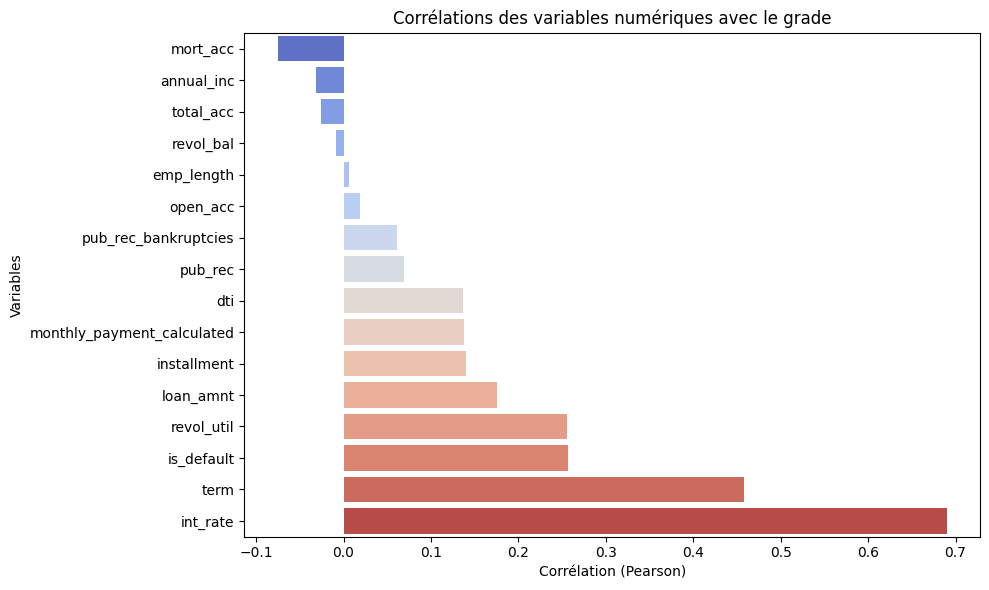

In [8]:
# 🎯 Encodage simple de la variable grade (A=1, B=2, ..., G=7)
grade_mapping = {grade: i+1 for i, grade in enumerate(sorted(df['grade'].dropna().unique()))}
df['grade_encoded'] = df['grade'].map(grade_mapping)

# 🎯 Corrélation entre grade et les variables numériques
num_vars = df.select_dtypes(include=['float', 'int']).drop(columns=['grade_encoded']).columns
correlations = df[num_vars].corrwith(df['grade_encoded']).sort_values(key=abs, ascending=False)
print("Corrélations avec grade (triées par importance) :")
print(correlations)

# 🎯 Moyenne du grade par modalité pour les colonnes catégorielles
cat_vars = ['home_ownership', 'verification_status', 'purpose', 'emp_length', 'application_type']
for col in cat_vars:
    print(f"\nMoyenne de grade_encoded selon {col} :")
    print(df.groupby(col)['grade_encoded'].mean().sort_values())

# Trier les corrélations et retirer les NaN
correlations_clean = correlations.dropna().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=correlations_clean.values, y=correlations_clean.index, palette='coolwarm')
plt.title("Corrélations des variables numériques avec le grade")
plt.xlabel("Corrélation (Pearson)")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()


C:\Users\Pierre\AppData\Local\Temp\ipykernel_11352\2443834418.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grade_by_home.values, y=grade_by_home.index, palette='crest')


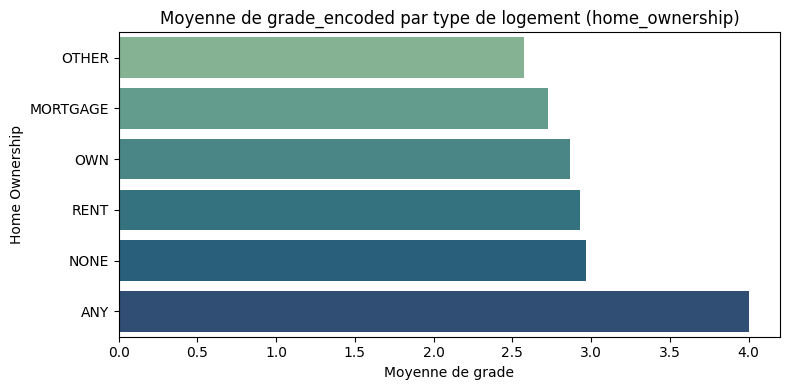

In [9]:
# Exemple avec home_ownership
grade_by_home = df.groupby('home_ownership')['grade_encoded'].mean().sort_values()

plt.figure(figsize=(8, 4))
sns.barplot(x=grade_by_home.values, y=grade_by_home.index, palette='crest')
plt.title("Moyenne de grade_encoded par type de logement (home_ownership)")
plt.xlabel("Moyenne de grade")
plt.ylabel("Home Ownership")
plt.tight_layout()
plt.show()